# (Pisa database)
## by (Shaima Ahmed)

## Preliminary Wrangling


> Pisa database is a database that contains data from all over the world. It has data about topics that students study, and many variables that may affect their progress in the study such as gender, socio-econmoic and pscological varoables.

In [75]:
#importing all packages and set plots 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

sb.set ()

# We will explore the formatting of all variables. Thus, we will display all of them
pd.set_option('display.max_rows', 636)
pd.set_option('display.max_columns', 636)

>Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [76]:
#Reading all records and raws in the file
pd.set_option ('display.max_rows', 636)
pd.set_option ('display.max_columns', 636)

df = pd.read_csv('pisa2012Egypt.csv', encoding='latin-1', low_memory = False)
df.head(3)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

In [57]:
df.shape

(485490, 636)

### What is the structure of your dataset?

> It has 485490 rows and 636 clumns

### What is/are the main feature(s) of interest in your dataset?

> I want to know if biology, parenting style and economical developement affect students progress in one or more study topics
I want to know which countries have the most talanted people

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 'CNT','OECD', 'ST03Q02', 'ST04Q01', 'AGE', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 
         'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'COBN_F', 'COBN_M', 'COBN_S'

In [58]:
#Selecting variables 
df = df[['CNT','OECD', 'ST03Q02', 'ST04Q01', 'AGE', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 
         'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'COBN_F', 'COBN_M', 'COBN_S']]
df.head()


,CNT,OECD,ST03Q02,ST04Q01,AGE,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,COBN_F,COBN_M,COBN_S
0,Albania,Non-OECD,1996,Female,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,Albania,Albania,Albania
1,Albania,Non-OECD,1996,Female,16.17,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,Albania,Albania,Albania
2,Albania,Non-OECD,1996,Female,15.58,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,Albania,Albania,Albania
3,Albania,Non-OECD,1996,Female,15.67,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,Albania,Albania,Albania
4,Albania,Non-OECD,1996,Female,15.50,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,Albania,Albania,Albania


>#Which columns have no data or NAN?

In [59]:

for column in df.columns:
    if (df[column].isna().sum() > 0):
        print((column) + '  ' + str(df[column].isna().sum()))


AGE  116
COBN_F  3665
COBN_M  3647
COBN_S  3654


>Replace nan with average in Age and with unkown in other values.

In [60]:


df.loc[np.isfinite(df['AGE']) == False, 'AGE'] = df['AGE'].mean()
df.loc[df['COBN_F'].isna() == True, 'COBN_F'] = 'Unkown'
df.loc[df['COBN_M'].isna() == True, 'COBN_M'] = 'Unkown'
df.loc[df['COBN_S'].isna() == True, 'COBN_S'] = 'Unkown'


df.loc[df['COBN_F'] == 'Invalid', 'COBN_F'] = 'Unkown'
df.loc[df['COBN_M'] == 'Invalid', 'COBN_M'] = 'Unkown'
df.loc[df['COBN_S'] == 'Invalid', 'COBN_S'] = 'Unkown'


In [61]:
##Selecting variables
df.rename({'CNT' : 'Country', 'ST03Q02' : 'Year of Birth', 'ST04Q01' : 'Gender', 'AGE' : 'Age', 'COBN_F' : 'Father', 'COBN_M' : 'Mom','COBN_S' : 'Child','OECD' : 'OECD'}, axis = 'columns', inplace = True)




In [62]:
#I assume that the final grade in each subject is the avarage of these variables
df['Math Grades'] = (df['PV1MATH'] + df['PV2MATH'] + df['PV3MATH'] + df['PV4MATH'] + df['PV5MATH'])/5
df['Science Grades'] = (df['PV1SCIE'] + df['PV2SCIE'] + df['PV3SCIE'] + df['PV4SCIE'] + df['PV5SCIE'])/5
df['Reading Grades'] = (df['PV1READ'] + df['PV2READ'] + df['PV3READ'] + df['PV4READ'] + df['PV5READ'])/5

In [63]:
# Drop any unnecessary columns

df.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 
                   'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace = True)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

>First part- What is the distrbuition of grades in all subjects?

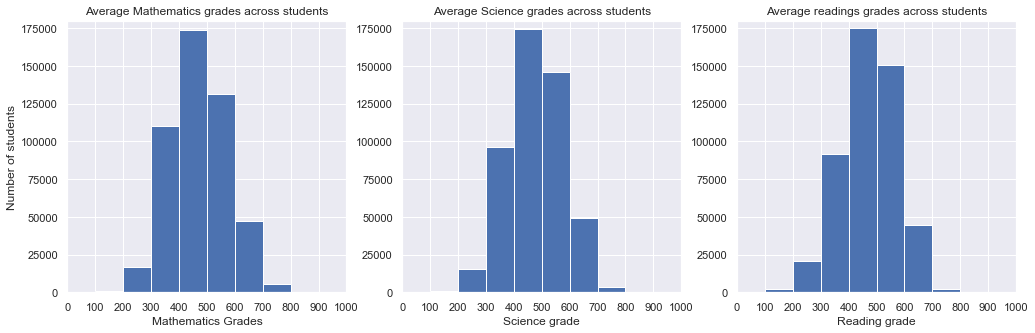

In [64]:
plt.figure(figsize = [17, 5])

bins_hist = np.arange(0, 1000 + 1, 100)

plt.subplot(1, 3, 1)
plt.hist(df['Math Grades'], bins = bins_hist, ec = 'white', alpha = 1);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Mathematics Grades');
plt.ylabel('Number of students')
plt.title("Average Mathematics grades across students");


plt.subplot(1, 3, 2)
plt.hist(df['Science Grades'], bins = bins_hist, ec = 'white', alpha = 1);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Science grade');
plt.title("Average Science grades across students");


plt.subplot(1, 3, 3)
plt.hist(df['Reading Grades'], bins = bins_hist, ec = 'white', alpha = 1);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Reading grade');
plt.title("Average readings grades across students");


> It seems that students’ grades are normally distributing for the three topics?
> It has 485490 rows and 636 clumns

>A question. Which countries had more achievers

In [65]:
##Which country has excellent achievers, assuming excellent = 770
Excellent_achiever_math= df[df['Math Grades'] > 770]['Country'].value_counts()
Excellent_achiever_reading= df[df['Reading Grades'] > 770]['Country'].value_counts()
Excellent_achiever_science = df[df['Science Grades'] > 770]['Country'].value_counts()

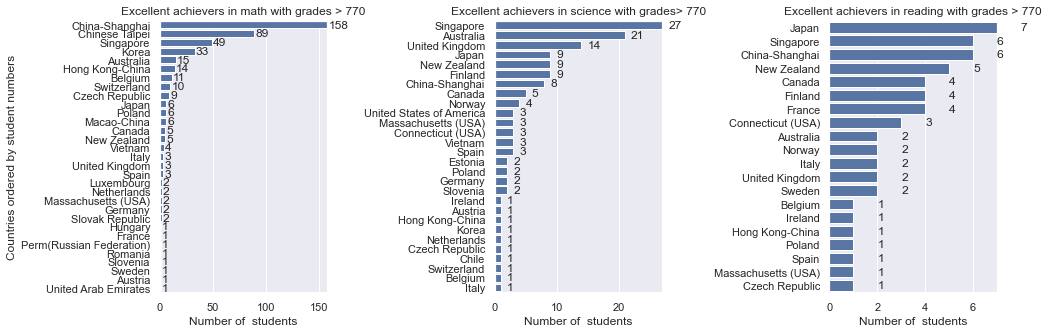

In [66]:
plt.figure(figsize = [15, 5])
plt.subplots_adjust(wspace = 1) # adjust spacing between subplots, in order to show long country names nicely
x_lim_max = Excellent_achiever_math.values[0]  
x_lim_max1 = Excellent_achiever_science.values[0] 
x_lim_max2 = Excellent_achiever_reading.values[0] 

plt.subplot(1, 3, 1)
sb.barplot(y = Excellent_achiever_math.index, x = Excellent_achiever_math.values, color = sb.color_palette()[0])
plt.title('Excellent achievers in math with grades > 770');
plt.xlabel('Number of  students')
plt.ylabel('Countries ordered by student numbers')


# Write the total number of students with exceptionally high scores in each country, right after the horizontal count bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = Excellent_achiever_math[label.get_text()] + 1, s = Excellent_achiever_math[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max);  


plt.subplot(1, 3, 2)
sb.barplot(y = Excellent_achiever_science.index, x = Excellent_achiever_science.values, color = sb.color_palette()[0])
plt.xlim(0, x_lim_max1);
plt.title('Excellent achievers in science with grades> 770');
plt.xlabel('Number of  students')

# Write the total number of students with exceptionally high scores in each country, right after the horizontal count bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = Excellent_achiever_science[label.get_text()] + 1, s = Excellent_achiever_science[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max1);



plt.subplot(1, 3, 3)
sb.barplot(y = Excellent_achiever_reading.index, x = Excellent_achiever_reading.values, color = sb.color_palette()[0])
plt.xlim(0, x_lim_max2);
plt.title('Excellent achievers in reading with grades > 770');
plt.xlabel('Number of  students')

# Write the total number of students with exceptionally high scores in each country, right after the horizontal count bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = Excellent_achiever_reading[label.get_text()] + 1, s = Excellent_achiever_reading[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max2);    


>When excellent achievement is set to obtaining grades more that 770
China has 158 in math, Singapore has 27 students in science and Japan has 7 students in reading. There are three Asian countries who have the top students in Math, two western countries in science and three Asian countries in reading
Asian countries may have their own teaching methodology that assist students to advance in the Math and reading topics., But their methods may have the same strength or less when it comes to science. However, there is weakness in reading all over the world. In other words, STEM students are doing better than students who study literature.


>A question. Does the sample have equal balance between parents the same culture and different culture

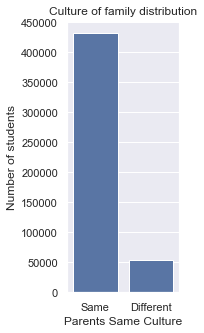

In [30]:
df['Parents Same Culture'] = (df['Father'] == df['Mom'])
df.loc[df['Parents Same Culture'] == True,'Parents Same Culture'] = 'Same'
df.loc[df['Parents Same Culture'] == False,'Parents Same Culture'] = 'Different'

plt.figure(figsize=[2, 5]);
sb.countplot(x = 'Parents Same Culture', data = df, color = sb.color_palette()[0]);

y_ticks = np.arange(0, 450000 + 1, 50000)
plt.yticks(y_ticks, y_ticks);
plt.ylabel("Number of students");
plt.title('Culture of family distribution');

>Answer: No, there are much more students who have parents from the same culture

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The representation of parents who have the same culture background is huge in comparrasion with parents who have different background. 

When I started by comparing between the grades in different countries, I had to experminet many values to get enough representation. 790 may not be the best choice for certain countries, but it is reflected in a better visual way

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, I checked if the database has NAN or not, because this will affect the results. I found that age and country of father, mother and child are missing. I averaged the age of missing students, and I rewrite father, mother and son's country to unkown. I needed the orgion of parents to check if they have the same culture or not. Age seemed an interesting factor to investigate, but I did not go further for it. I renamed fields to a meaningful names to simulate my mind and keep me alreted. I also dropped other fields to speed the process

Text(0.5, 1.0, 'Students')

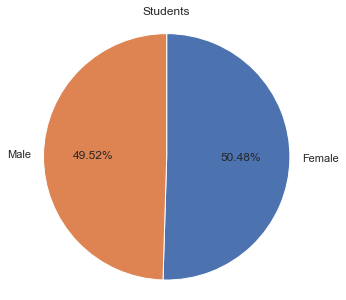

In [67]:
## I wanted to make sure that both males and females are represented equally so I did this

labels = ['Female', 'Male']
plt.figure(figsize=[8, 5])
plt.pie(df['Gender'].value_counts(), labels=labels, autopct='%.2f%%', startangle=90, counterclock=False, )
plt.axis('square')
plt.title('Students')

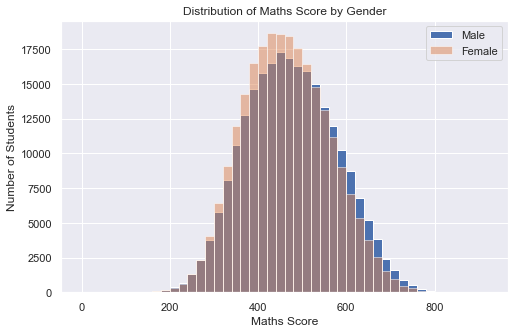

In [68]:
##Then I wanted to know how did males and females did in all subjects
# Histogram for both males and females' maths scores
binsize = 20
bins = np.arange(0, df['Math Grades'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df[df['Gender']=='Male'], x='Math Grades', bins = bins, label='Male', alpha=1)
plt.hist(data=df[df['Gender']=='Female'], x='Math Grades', bins = bins, label='Female', alpha=0.5)
plt.title('Distribution of Maths Score by Gender')
plt.xlabel('Maths Score')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

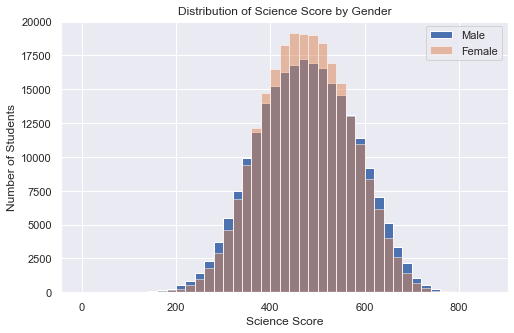

In [69]:
# Histogram for both males and females' maths scores
binsize = 20
bins = np.arange(0, df['Science Grades'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df[df['Gender']=='Male'], x='Science Grades', bins = bins, label='Male', alpha=1)
plt.hist(data=df[df['Gender']=='Female'], x='Science Grades', bins = bins, label='Female', alpha=0.5)
plt.title('Distribution of Science Score by Gender')
plt.xlabel('Science Score')
plt.ylabel('Number of Students')
plt.legend()
plt.show()


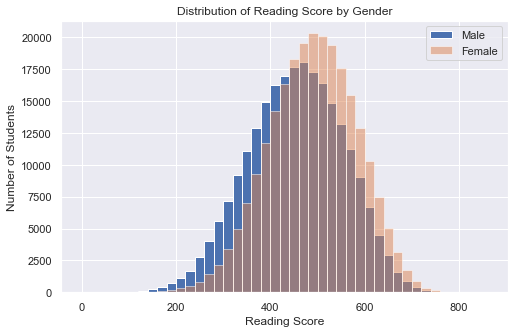

In [70]:
# Histogram for both males and females' Reading scores
binsize = 20
bins = np.arange(0, df['Reading Grades'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df[df['Gender']=='Male'], x='Reading Grades', bins = bins, label='Male', alpha=1)
plt.hist(data=df[df['Gender']=='Female'], x='Reading Grades', bins = bins, label='Female', alpha=0.5)
plt.title('Distribution of Reading Score by Gender')
plt.xlabel('Reading Score')
plt.ylabel('Number of Students')
plt.legend()
plt.show()


>Conclusions: It was found that boys did better in math, while girls did better in reading and 
both achieved the same in the science. Number of girls in the middle of the histogram 
was much higher than boys. It is possible that the missing data were connected to boys, 
and it is possible that some boys faild

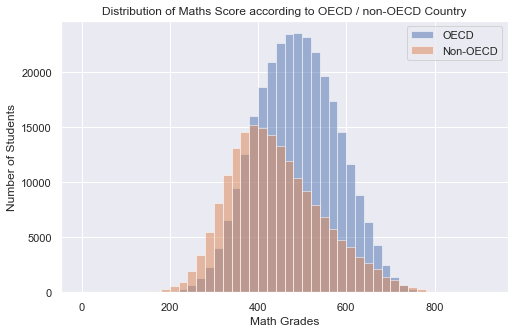

In [71]:
# Histogram for both males and females' maths scores
binsize = 20
bins = np.arange(0, df['Math Grades'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df[df['OECD']=='OECD'], x='Math Grades', bins = bins, label='OECD', alpha=0.5)
plt.hist(data=df[df['OECD']=='Non-OECD'], x='Math Grades', bins = bins, label='Non-OECD', alpha=0.5)
plt.title('Distribution of Maths Score according to OECD / non-OECD Country')
plt.xlabel('Math Grades')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

>Conclusioion:When I compared between math results for OECD and non OECD, It was clear that students perform better on OECD countries.

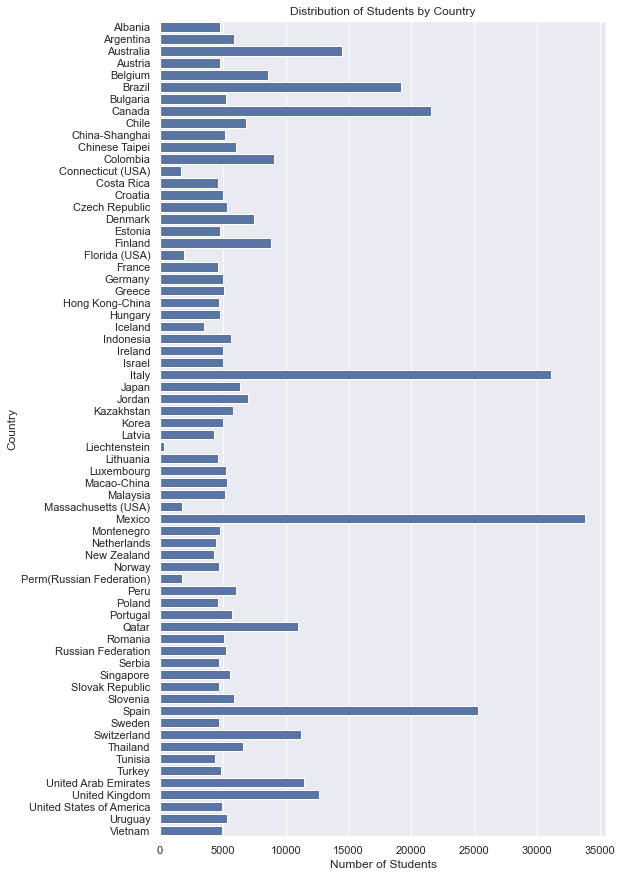

In [35]:
# Start by visualising the number of students represented per country.
plt.figure(figsize=[8, 15])
base_color = sb.color_palette()[0]
sb.countplot(data=df.sort_values(by='Country'), y='Country', color=base_color);
plt.title('Distribution of Students by Country')
plt.xlabel('Number of Students')
plt.ylabel('Country')
plt.show()

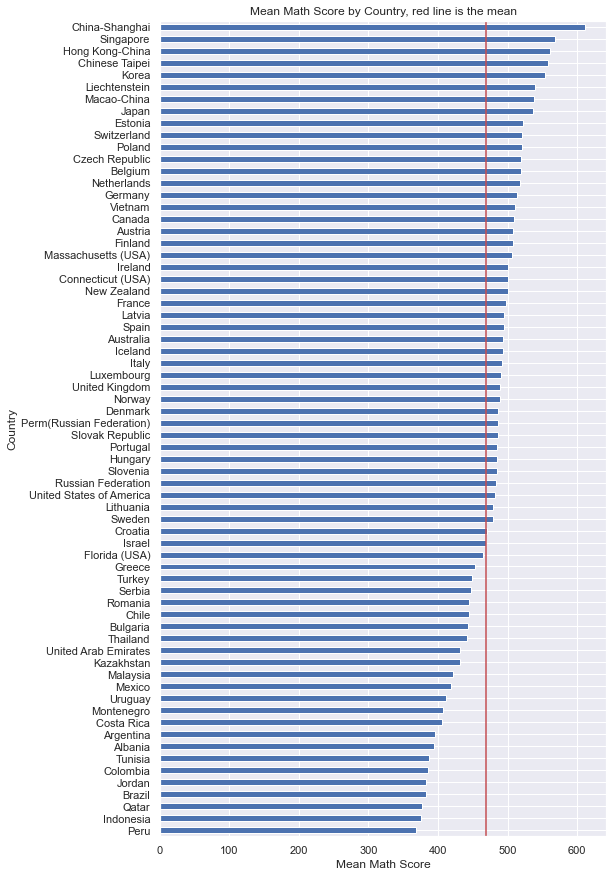

In [36]:
plt.figure(figsize=[8, 15])
df.groupby('Country').mean()['Math Grades'].sort_values(ascending=True).plot(kind='barh')
plt.title('Mean Math Score by Country, red line is the mean')
plt.xlabel('Mean Math Score')
plt.ylabel('Country')
plt.axvline(df['Math Grades'].mean(), color='r')
plt.show()

In [38]:
Excellent_achiever_math_and_reading_grades = df[(df['Math Grades'] >= 790) & (df['Reading Grades'] >= 790)]['Country'].value_counts()
Excellent_achiever_math_and_science_grades = df[(df['Math Grades'] >= 790) & (df['Science Grades'] >= 790)]['Country'].value_counts()
Excellent_achiever_reading_and_science_grades = df[(df['Reading Grades'] >= 790) & (df['Science Grades'] >= 790)]['Country'].value_counts()
All_grades = df[(df['Math Grades'] >= 790) & (df['Reading Grades'] >= 790) & (df['Science Grades'] >= 790)]['Country'].value_counts()


>Conclusions: When I compare between the number of students in each countriy and how much their mean math mean score they represnt. I find the there is no overestimation in the result due to the size sample that represnets the country. Example : ITaly has one of the highest represntation in the sample, but it is not one of the top performers. The majority od countries were above average

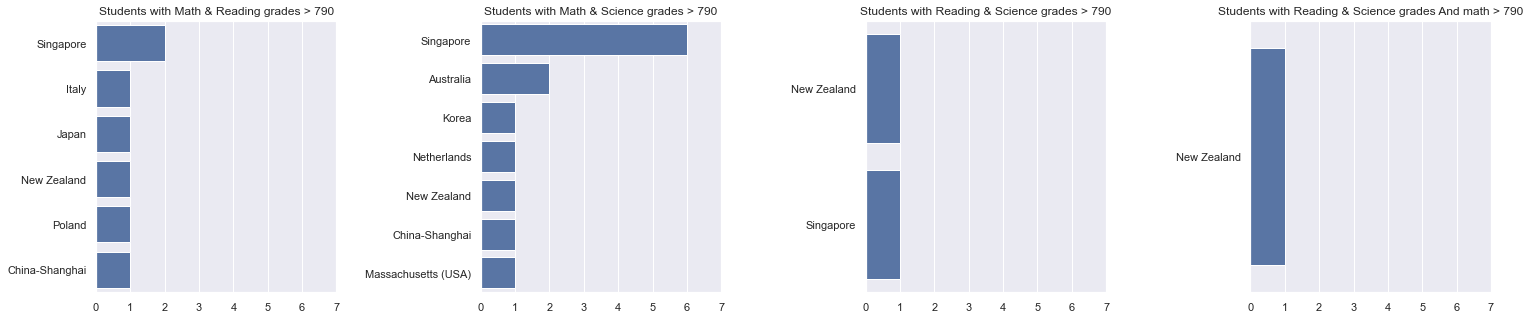

In [39]:

plt.figure(figsize = [25, 5])
plt.subplots_adjust(wspace = 0.6) 
x_lim_max = Excellent_achiever_math_and_science_grades.values[0]

plt.subplot(1, 4, 1)
sb.barplot(y = Excellent_achiever_math_and_reading_grades.index, x = Excellent_achiever_math_and_reading_grades.values, color = sb.color_palette()[0])
plt.title('Students with Math & Reading grades > 790');
plt.xticks(np.arange(0, x_lim_max + 2, 1));


plt.subplot(1, 4, 2)
sb.barplot(y = Excellent_achiever_math_and_science_grades.index, x = Excellent_achiever_math_and_science_grades.values, color = sb.color_palette()[0])
plt.title('Students with Math & Science grades > 790');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

plt.subplot(1, 4, 3)
sb.barplot(y = Excellent_achiever_reading_and_science_grades.index, x = Excellent_achiever_reading_and_science_grades.values, color = sb.color_palette()[0])
plt.title('Students with Reading & Science grades > 790');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

plt.subplot(1, 4, 4)
sb.barplot(y = All_grades.index, x = All_grades.values, color = sb.color_palette()[0])
plt.title('Students with Reading & Science grades And math > 790');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

>It seems that only one country has multi talanted students. Singabour has a very high potentail when it comes to have two talantes

In [73]:
##Does gender matter?
Excellent_achiever_math_and_reading_grades1 = df[(df['Math Grades'] >= 790) & (df['Reading Grades'] >= 790)]['Gender'].value_counts()
Excellent_achiever_math_and_science_grades1 = df[(df['Math Grades'] >= 790) & (df['Science Grades'] >= 790)]['Gender'].value_counts()
Excellent_achiever_reading_and_science_grades1 = df[(df['Reading Grades'] >= 790) & (df['Science Grades'] >= 790)]['Gender'].value_counts()


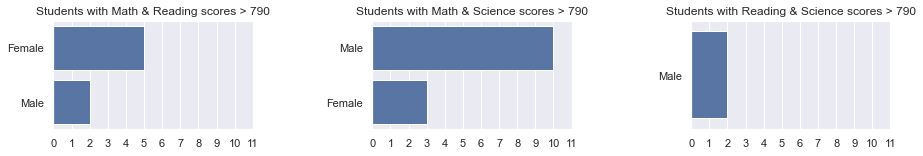

In [74]:
##Does gender matter?
plt.figure(figsize = [15, 2])
plt.subplots_adjust(wspace = 0.6) # adjust spacing between subplots, in order to show long country names nicely
x_lim_max = Excellent_achiever_math_and_science_grades1.values[0] # adjust the proportions of the x-axis with respect to all 3 plots using this

plt.subplot(1, 3, 1)
sb.barplot(y = Excellent_achiever_math_and_reading_grades1.index, x = Excellent_achiever_math_and_reading_grades1.values, color = sb.color_palette()[0])
plt.title('Students with Math & Reading scores > 790');
plt.xticks(np.arange(0, x_lim_max + 2, 1));


plt.subplot(1, 3, 2)
sb.barplot(y = Excellent_achiever_math_and_science_grades1.index, x = Excellent_achiever_math_and_science_grades1.values, color = sb.color_palette()[0])
plt.title('Students with Math & Science scores > 790');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

plt.subplot(1, 3, 3)
sb.barplot(y = Excellent_achiever_reading_and_science_grades1.index, x = Excellent_achiever_reading_and_science_grades1.values, color = sb.color_palette()[0])
plt.title('Students with Reading & Science scores > 790');
plt.xticks(np.arange(0, x_lim_max + 2, 1));

>Grils did much better in math and reading, while boys did better in math and science and it seems that only males did well in reading and science. Multi talanted analysis may change if the grades were less or more than 790

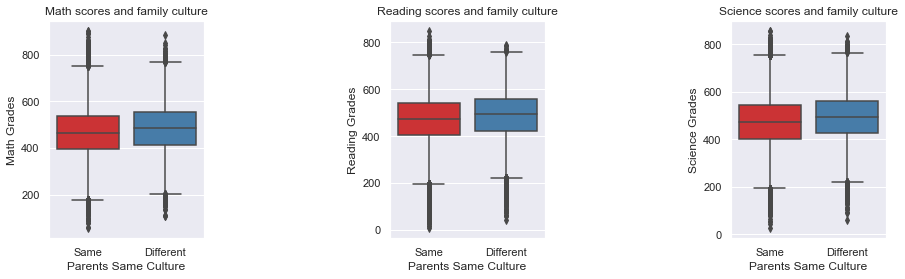

In [47]:
plt.figure(figsize = [15, 4])
plt.subplots_adjust(wspace = 1.2)

plt.subplot(1, 3, 1)
sb.boxplot(x = df['Parents Same Culture'], y = df['Math Grades'], palette = 'Set1')
plt.title('Math scores and family culture');

plt.subplot(1, 3, 2)
sb.boxplot(x = df['Parents Same Culture'], y = df['Reading Grades'], palette = 'Set1')
plt.title('Reading scores and family culture');

plt.subplot(1, 3, 3)
sb.boxplot(x = df['Parents Same Culture'], y = df['Science Grades'], palette = 'Set1');
plt.title('Science scores and family culture');

>Having parents from the same culture affects the results of the three subjects on individual level and the range is almost the same. This could be because the same parents are over represntitive. However, when we copare between the boxplots, and we notice that the difference is so little, we can conclude that that having more data as the same culture may not real, and the analysis reflects reality 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I wanted to see if there is a relationship between average grades in the three topics or some people can fail or excel in the other topics. How will the relationship between same/different culture of parents, OEDC and gender visualized, and what is the coorelation

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

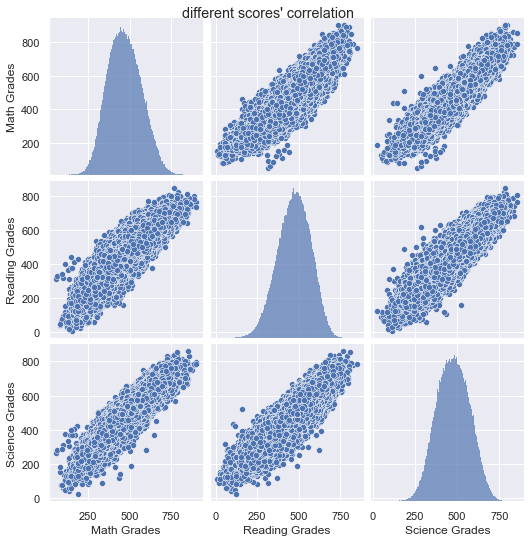

In [48]:
grid = sb.pairplot(data = df, vars=["Math Grades", "Reading Grades", "Science Grades"]);
grid.fig.suptitle(" different scores' correlation", y = 1);

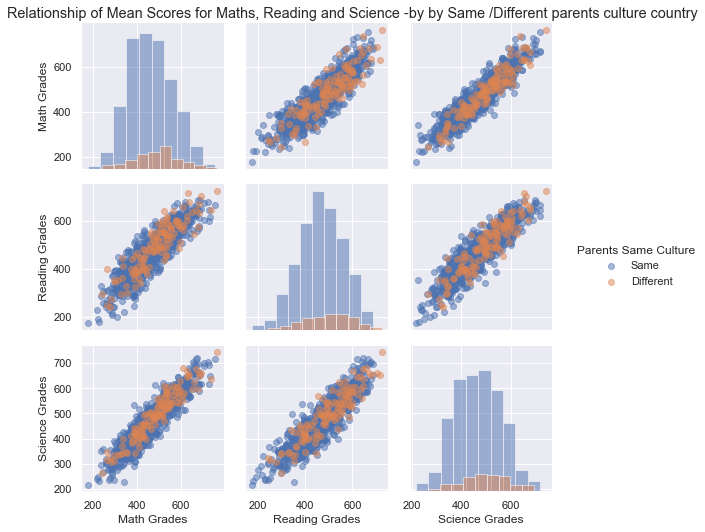

In [51]:
# Pair Grid for mean gardes by Same /Different parents culture country)

# Sample 1000 students so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data=df_samp, vars = ['Math Grades', 'Reading Grades', 'Science Grades'], hue='Parents Same Culture')
g.map_diag(plt.hist, alpha=0.5)
g.map_offdiag(plt.scatter, alpha=0.5)
g.add_legend()
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Relationship of Mean Scores for Maths, Reading and Science -by by Same /Different parents culture country');

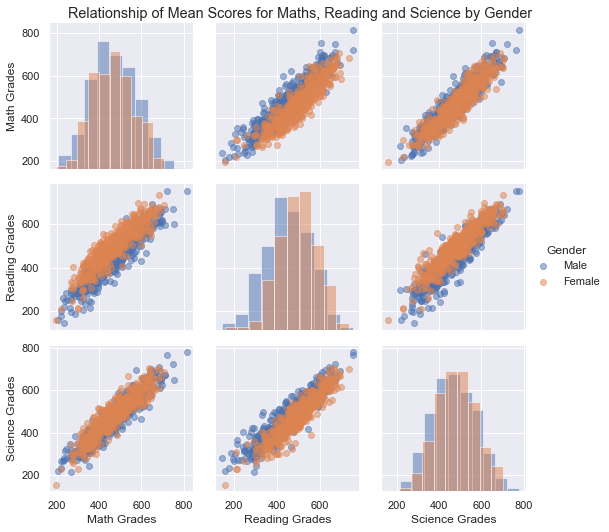

In [50]:
# PairGrid for mean scores (by Gender)

# Sample 1000 students to get clearer and they render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data=df_samp, vars = ['Math Grades', 'Reading Grades', 'Science Grades'], hue='Gender')
g.map_diag(plt.hist, alpha=0.5)
g.map_offdiag(plt.scatter, alpha=0.5)
g.add_legend()
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Relationship of Mean Scores for Maths, Reading and Science by Gender');

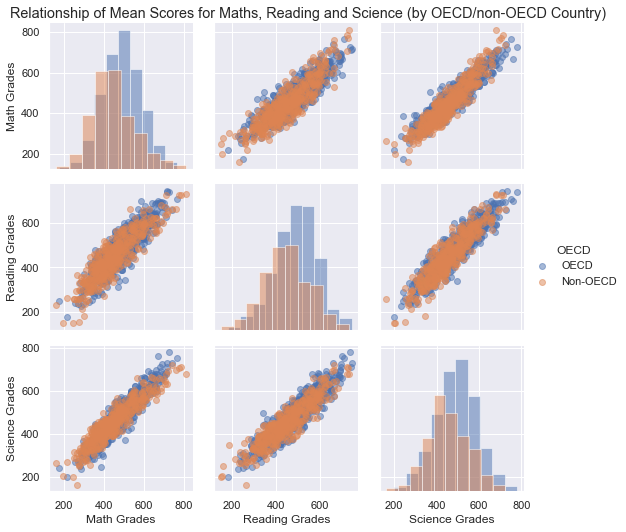

In [52]:
# PairGrid for mean scores (by OECD/non-OECD country)

# Sample 1000 students to  get clearer and they render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data=df_samp, vars = ['Math Grades', 'Reading Grades', 'Science Grades'], hue='OECD')
g.map_diag(plt.hist, alpha=0.5)
g.map_offdiag(plt.scatter, alpha=0.5)
g.add_legend()
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Relationship of Mean Scores for Maths, Reading and Science (by OECD/non-OECD Country)');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The mean score of three topics are positively and strongly correlated with each others. This means if someone is excellent in one subject, he will be automatically good in other two subjects, but this is not true for top achiever thou. There is no significant observed when it comes to gender. Grades in each subjects are between 300 and 600 points. There is a small portion that did not do well, and their range is between 100 and 300. Top achievers grades were between 600 and 800 points. Top males and females Overlapeed

### Were there any interesting or surprising interactions between features?

> It was cleared that parents from same culture affect the achievement of therir children 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!